In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import KFold

from sklearn.cross_validation import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Lasso, Ridge

%pylab inline

/home/sneddy/UserLibs/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/sneddy/UserLibs/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Populating the interactive namespace from numpy and matplotlib


In [2]:
heroes = pd.read_csv('data/heroes.csv', index_col='mid')
heroes.head()

,player_0,player_1,player_2,player_3,player_4,player_5,player_6,player_7,player_8,player_9
mid,,,,,,,,,,
0,91,42,87,15,65,11,6,34,69,74
1,69,85,71,24,64,74,68,39,65,11
2,17,40,31,67,99,32,7,72,48,104
3,80,43,101,71,94,69,70,98,24,39
4,25,15,75,29,95,3,32,55,64,86


In [3]:
heroes.max()[0]

110

In [4]:
new_gold = pd.read_csv('data/gold.csv', index_col='mid')
new_gold = new_gold[new_gold.times == 600]
new_gold.drop('times', 1, inplace=True)
new_gold.head()

,player_0,player_1,player_2,player_3,player_4,player_5,player_6,player_7,player_8,player_9
mid,,,,,,,,,,
0,3454,5206,2613,4426,5755,4072,3997,5917,1725,6384
1,2477,5760,3816,4353,5759,7659,5066,2748,4440,4623
2,3604,1948,8581,4390,2869,3096,2301,5130,2530,2491
3,3457,5464,4432,2961,4314,3345,4791,1906,5328,2247
4,3675,4103,5154,3030,2076,3920,3494,3392,4458,2220


In [5]:
mean_gold = np.zeros(111)
for hero_num in range(111):
    hero_values = []
    for player_num in range(10):
        colname = 'player_{}'.format(player_num)
        hero_index = heroes.loc[heroes[colname] == hero_num].index
        hero_values.extend(new_gold.loc[hero_index][colname].values)
    mean_gold[hero_num] = int(np.mean(hero_values))

mean_gold[0] = 10000
mean_gold = mean_gold.astype(int)
print mean_gold

SyntaxError: Missing parentheses in call to 'print' (<ipython-input-5-6b8779fc36a6>, line 12)

In [6]:
new_xp = pd.read_csv('data/xp.csv', index_col='mid')
new_xp = new_xp[new_xp.times == 600]
new_xp.drop('times', 1, inplace=True)
new_xp.head()

,player_0,player_1,player_2,player_3,player_4,player_5,player_6,player_7,player_8,player_9
mid,,,,,,,,,,
0,1696,4304,1606,4429,3821,3745,3635,4846,357,2347
1,1542,4481,1961,2437,4810,4514,3510,2248,3403,3662
2,2851,1986,6234,2667,4265,2402,1541,3212,2864,2426
3,1145,4640,4202,1769,3786,3529,2962,1400,4512,1530
4,2197,3525,4855,3239,1518,3373,1935,2563,3281,1924


In [7]:
mean_xp = np.zeros(111)
for hero_num in range(111):
    hero_values = []
    for player_num in range(10):
        colname = 'player_{}'.format(player_num)
        hero_index = heroes.loc[heroes[colname] == hero_num].index
        hero_values.extend(new_xp.loc[hero_index][colname].values)
    mean_xp[hero_num] = int(np.mean(hero_values))
mean_xp[0] = 10000
mean_xp = mean_xp.astype(int)
print mean_xp

SyntaxError: Missing parentheses in call to 'print' (<ipython-input-7-d3c82adaeb7c>, line 11)

In [9]:
new_lh = pd.read_csv('data/lh.csv', index_col='mid')
new_lh = new_lh.loc[new_lh.times == 600].drop('times', 1)
new_lh.head()

,player_0,player_1,player_2,player_3,player_4,player_5,player_6,player_7,player_8,player_9
mid,,,,,,,,,,
0,4,43,3,57,41,34,35,75,2,46
1,5,63,14,28,47,49,23,3,30,39
2,34,6,69,42,23,6,12,56,13,12
3,1,49,48,3,31,28,51,6,50,8
4,30,41,45,23,4,26,9,23,37,6


In [11]:
mean_creep_stat = np.zeros(111)
for hero_num in range(111):
    hero_values = []
    for player_num in range(10):
        colname = 'player_{}'.format(player_num)
        hero_index = heroes.loc[heroes[colname] == hero_num].index
        hero_values.extend(new_lh.loc[hero_index][colname].values)
    mean_creep_stat[hero_num] = int(np.mean(hero_values))
mean_creep_stat[0] = 1000
mean_creep_stat = mean_creep_stat.astype(int)
# print mean_creep_stat

In [12]:
def normalize_data(X):
    return pd.DataFrame(
        StandardScaler().fit_transform(X),
        index = X.index, 
        columns=X.columns
    )

In [16]:
hero_stats = np.stack([mean_gold, mean_xp, mean_creep_stat], axis=1)

NameError: name 'mean_gold' is not defined

In [14]:
hero_stats = pd.DataFrame(data = hero_stats, columns=['gold', 'exp', 'creeps'], index=np.arange(111))
hero_stats = hero_stats.loc[1:, :]
hero_stats.head()

NameError: name 'hero_stats' is not defined

In [15]:
hero_stats = normalize_data(hero_stats)
hero_stats.head()

NameError: name 'hero_stats' is not defined

In [28]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D

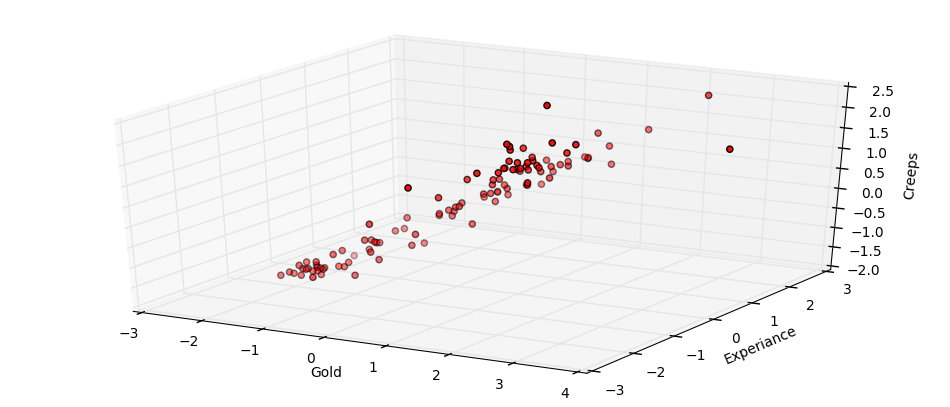

In [29]:
fig = plt.figure(figsize=[12,5])
ax = fig.add_subplot(111, projection='3d')


xs = hero_stats.gold
ys = hero_stats.exp
zs = hero_stats.creeps
ax.scatter(xs, ys, zs, c='r')

ax.set_xlabel('Gold')
ax.set_ylabel('Experiance')
ax.set_zlabel('Creeps')

plt.show()

In [34]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(hero_stats)
hero_stats['label'] = kmeans.labels_
print hero_stats.label.head()

1    0
2    2
3    2
4    1
5    2
Name: label, dtype: int32


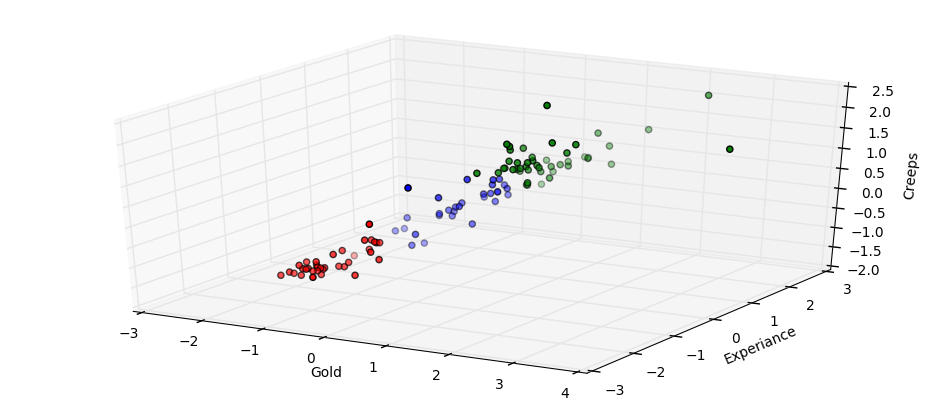

In [31]:
fig = plt.figure(figsize=[12,5])
ax = fig.add_subplot(111, projection='3d')


xs = hero_stats.loc[hero_stats.label == 0].gold
ys = hero_stats.loc[hero_stats.label == 0].exp
zs = hero_stats.loc[hero_stats.label == 0].creeps
ax.scatter(xs, ys, zs, c='r')

xs = hero_stats.loc[hero_stats.label == 1].gold
ys = hero_stats.loc[hero_stats.label == 1].exp
zs = hero_stats.loc[hero_stats.label == 1].creeps
ax.scatter(xs, ys, zs, c='g')

xs = hero_stats.loc[hero_stats.label == 2].gold
ys = hero_stats.loc[hero_stats.label == 2].exp
zs = hero_stats.loc[hero_stats.label == 2].creeps
ax.scatter(xs, ys, zs, c='b')

ax.set_xlabel('Gold')
ax.set_ylabel('Experiance')
ax.set_zlabel('Creeps')

plt.show()

In [48]:
hero_stats['label'] = kmeans.labels_
hero_stats.head()

,gold,exp,creeps,label
1,1.180542,0.515337,1.533333,0
2,0.316252,0.388943,0.400835,2
3,-0.352097,-0.561478,-0.882662,2
4,-1.059366,-1.147489,-1.335660,1
5,-0.166892,0.182116,-0.278663,2


In [55]:
final_labels = pd.DataFrame(np.hstack([0, kmeans.labels_ + 1]), columns=['Cluster'])
final_labels.head()
# final_labels.to_csv('processing_tables/heroes_labels.csv', index=None)

,Cluster
0,0
1,1
2,3
3,3
4,2


In [57]:
final_labels['Left'] = final_labels.Cluster.apply(lambda x: 1 if x==0 else 0)
final_labels.head()

,Cluster,Left
0,0,1
1,1,0
2,3,0
3,3,0
4,2,0
